# Problema 9

Generamos una distribución de N puntos aleatorios $x_i \in (a,b)$ y obtenemos el par $(x_i,y_i)$ al calcular <br>
<center> $f(x_i) = A \cdot x_i + B$ </center> <br>
Y agregamos un error aleatorio $e_i$:
<center> $y_i = f(x_i)+ e_i$ </center> <br>

#### *Por simplicidad, pedimos $(a,b) = (0,1)$ y $A = 1$, $B=0$*

#### Definimos nuestra $f(x)$

In [1]:
#Dados N (N=10^i con i = 1,..,4) pts entre (a;b) que siguen y(x)=alpha*x + beta, agregar un error aleatorio e=10^-i con i = 0,...,4 y luego ajustar
#una recta: p(x)=A*x+B. Graficar A(N) y B(N), A(e) y B(e).

a = parse(Float64, readline())
b = parse(Float64, readline()) #Para introducir cominezo y final del dominio de mi función

alpha = parse(Float64, readline())
beta = parse(Float64, readline()) #Parámetros de la recta

println("y(x)= $alpha · x + $beta en el rango ($a,$b)")

stdin>  0
stdin>  1
stdin>  1
stdin>  0


y(x)= 1.0 · x + 0.0 en el rango (0.0,1.0)


Nos interesa encontrar el mejor **ajuste lineal** para el caso $N = 10^j$, con $j \in (1,2,3,4)$; y con el error agregado como $e = 10^{-i}$, con $i \in (0,1,2,3,4)$ <br> <br>
Creamos una función que genera los $N$ $x_i$ randoms, aplica $f(x_i)$, agrega un error aleatorio $e_i$ a cada uno y calcula los valores del mejor ajuste lineal vía cuadrados mínimos $A_k$ y $B_k$ tal que el ajuste queda de la forma <br>
<center> $F_k(x) = A_k \cdot x + B_k$ </center> <br>
Donde el subíndice $k$ se refiere a las distintas configuración de $i$ y $j$.

### Inicio código

In [45]:
using Plots

function linfit(N::Int64,i::Int64) # N = cantidad de puntos; i = orden de magnitud del error.

    X = (b-a).*rand(N) .+ a #pedimos N números aleat entre 0 y 1 y lo llevamos al rango (a,b) (si, el ej pide dom aleatorio)
    Y = ones(N) #creo un array de dim = N, para almacenar la imag de la func lineal + error aleatorio
    
    local m::Float64
    m = 9*(10.0^(-i)) #para def error
    
    for j in 1:N
        e = -m + rand()*(2*m) #Error aleatorio, transformo el número linealmente al rango (-9*10^-i;9*10^-i)
        Y[j] = alpha*X[j] + beta + e
    end

    #Quiero ajustar estos puntos con una lineal: p(x)=A*x+B. Encuentro A y B con el método de cuadrados mínimos.

    B = ((sum(X.*Y)*sum(X))-(sum(X.^2)*sum(Y)))/((sum(X)^2)-N*sum(X.^2))
    A = (sum(Y)-N*B)/sum(X)

    x = collect(a:(b-a)/N:b) #Dom para graficar
    z = x -> A*x + B #recta ajustada (func anónima)

    plt = plot(x,z,line=(0.8,3),label="Ajuste",title="Ajuste lineal de $N puntos con error de orden 10^-$i",size=(800,800),
                xlabel="x",ylabel="y",xtickfontsize=15,ytickfontsize=15,xlabelfontsize=15,ylabelfontsize=15)
    plt2 = scatter!(X,Y,label="Números aleatorios",alpha=0.3)
    
    #Para testear:
    
    #println("Para un conjunto de $N puntos, con error aleatorio en y de orden 10^-$i resulta:")
    #println("A = $A, B = $B")
    #display(plt2)
    #savefig(plt,"AjusteN$N_e$i.png") 

    return A,B
end

linfit (generic function with 1 method)

#### Probamos viendo sólo 1 ejemplo:

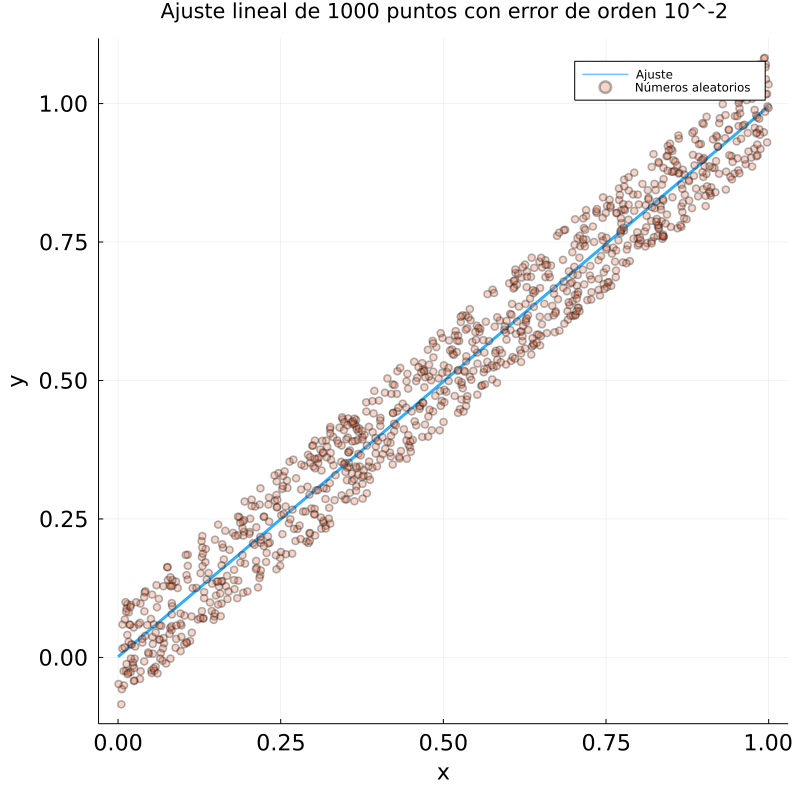

Para un conjunto de 1000 puntos, con error aleatorio en y de orden 10^-2 resulta:
A = 0.993856916833967, B = 0.0011781596525402096


(0.993856916833967, 0.0011781596525402096)

In [31]:
linfit(1_000,2)

### Fin código

Ahora, guardemos cada $A_k,B_k$ obtenido del ajuste lineal variando la cantidad de puntos y la magnitud del error aleatorio, para luego graficar.

In [49]:
A_k = zeros(5,4) #5 filas para las 5 difs mag de error, 4 column para las 4 cant de pts
B_k = zeros(5,4)

for i in 0:4
    for j in 1:4
        N = 10^j
        A_k[i+1,j] = linfit(N,i)[1]
        B_k[i+1,j] = linfit(N,i)[2]
    end
end
A_k

5×4 Matrix{Float64}:
 -6.43753   4.70122   1.60381   1.40376
 -0.227892  1.12213   0.960192  0.968066
  0.975932  1.01251   0.998893  1.00203
  0.997296  1.00001   1.00049   1.00004
  1.00042   0.999942  1.00002   1.00003

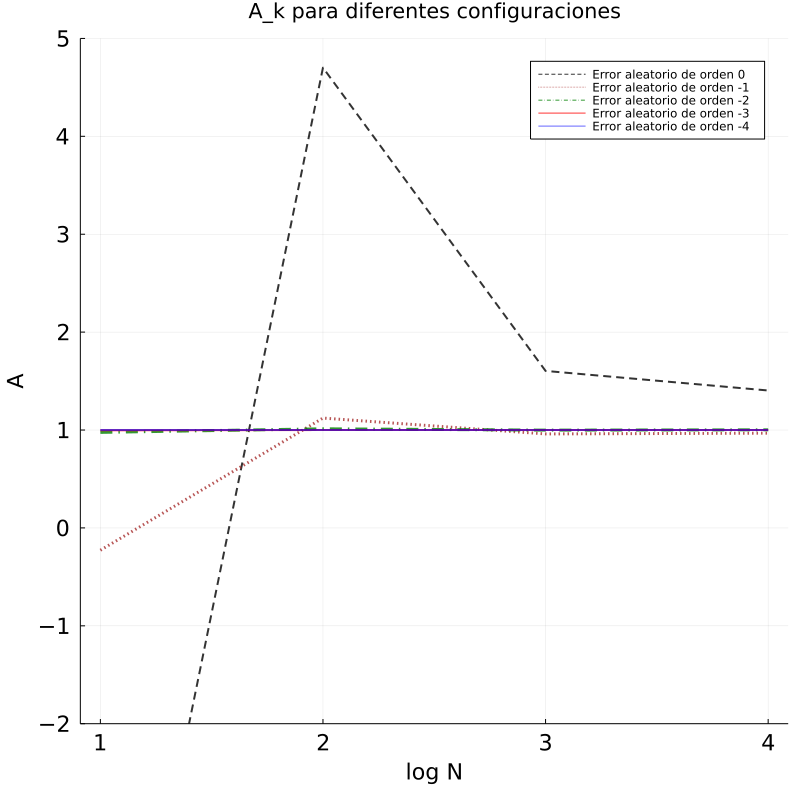

In [110]:
plot([i for i in 1:4],A_k[1,:],lw=2,ls=:dash,lc="black",la=0.8,label="Error aleatorio de orden 0",
            title="A_k para diferentes configuraciones",size=(800,800), yticks = -5:1:5,ylim=(-2,5),
            xlabel="log N",ylabel="A",xtickfontsize=15,ytickfontsize=15,xlabelfontsize=15,ylabelfontsize=15)
plot!([i for i in 1:4],A_k[2,:],lw=3,ls=:dot,lc="brown",la=0.8,label="Error aleatorio de orden -1")
plot!([i for i in 1:4],A_k[3,:],lw=3,ls=:dashdot,lc="green",la=0.8,label="Error aleatorio de orden -2")
plot!([i for i in 1:4],A_k[4,:],lw=2,ls=:solid,lc="red",la=0.8,label="Error aleatorio de orden -3")
plot!([i for i in 1:4],A_k[5,:],lw=2,ls=:solid,lc="blue",la=0.6,label="Error aleatorio de orden -4")

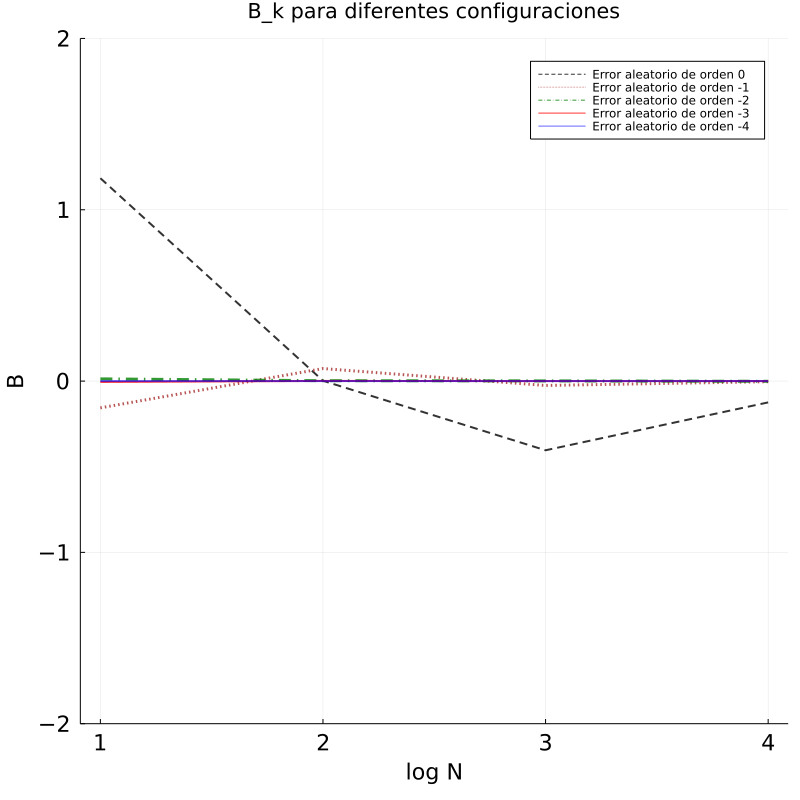

In [112]:
plot([i for i in 1:4],B_k[1,:],lw=2,ls=:dash,lc="black",la=0.8,label="Error aleatorio de orden 0",
            title="B_k para diferentes configuraciones",size=(800,800), yticks = -5:1:5,ylim=(-2,2),
            xlabel="log N",ylabel="B",xtickfontsize=15,ytickfontsize=15,xlabelfontsize=15,ylabelfontsize=15)
plot!([i for i in 1:4],B_k[2,:],lw=3,ls=:dot,lc="brown",la=0.8,label="Error aleatorio de orden -1")
plot!([i for i in 1:4],B_k[3,:],lw=3,ls=:dashdot,lc="green",la=0.8,label="Error aleatorio de orden -2")
plot!([i for i in 1:4],B_k[4,:],lw=2,ls=:solid,lc="red",la=0.8,label="Error aleatorio de orden -3")
plot!([i for i in 1:4],B_k[5,:],lw=2,ls=:solid,lc="blue",la=0.6,label="Error aleatorio de orden -4")

### *Recordamos que $A \rightarrow 1$ y $B \rightarrow 0$*